In [1]:
try:
    from imports import *
except ModuleNotFoundError:
    import sys; sys.path.append("../../")
    from imports import *

# The role of correlated hopping in many-body physics of flat-band systems: Nagaoka ferromagnetism

In [5]:
prefix = Path("data/data")
os.makedirs("assets", exist_ok=True)

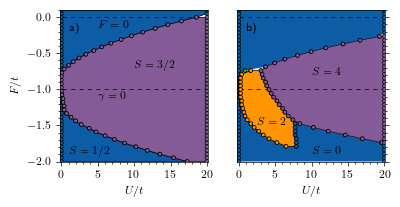

In [4]:
def _patch(t, S, **kwargs):
    g = t[np.isclose(t["S"], S)].groupby("F")
    return matplotlib.patches.Polygon(np.vstack([
        g.min("U").reset_index()[["U", "F"]].to_numpy(),
        g.max("U").reset_index()[["U", "F"]].to_numpy()[::-1]
    ]), closed=True, **kwargs)
    
with plt.style.context(["science", "scatter", style]):
    w = style["figure.figsize"][0]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(0.9 * w, 0.4 * w))
    fig.subplots_adjust(wspace=0.07)

    t1 = pd.read_csv(prefix / "4/phases.dat", sep=r"\s+", comment="#", names=["F", "U", "S"]) \
            .assign(S=lambda df: np.round(df["S"], decimals=1))
    colors1 = {0.5: "C0", 1.5: "C4"}
    t2 = pd.read_csv(prefix / "9/phases.dat", sep=r"\s+", comment="#", names=["F", "U", "S"]) \
            .assign(S=lambda df: np.round(df["S"], decimals=1))
    colors2 = dict((c, f"C{c}") for c in range(5))
    
    for ax, t, colors in [(ax1, t1, colors1), (ax2, t2, colors2)]:
        for S in colors:
            kwargs = dict(ec="black", linewidth=0.5) if S != 0 else dict()
            ax.add_patch(_patch(t, S=S, fc=colors[S], zorder=0, **kwargs))
        ax.scatter(t["U"], t["F"], c=list(map(colors.__getitem__, np.round(t["S"], 1))),
                   s=7, marker="o", edgecolor="black", linewidth=0.5, zorder=1)
        ax.plot([-1, 21], [-1.0, -1.0], dashes=(6, 6), color="black", linewidth=0.5, marker="none", zorder=0.5)
        ax.plot([-1, 21], [0, 0], dashes=(6, 6), color="black", linewidth=0.5, marker="none", zorder=0.5)
        ax.set_xlim((-0.2, 20.1)); ax.set_ylim((-1.95, 0.1))
        ax.set_yticks([-2, -1.5, -1, -0.5, 0]); ax.set_xticks([0, 5, 10, 15, 20])
        
    ax1.tick_params(axis="both", which="both", direction="out", top=False, right=False)
    ax1.set_xlabel(r"$U/t$"); ax1.set_ylabel(r"$F/t$"); ax1.set_aspect(20.3 / 2.05)
    ax1.text(1, -0.2, "a)"); ax1.text(5, -0.15, r"$F=0$"); ax1.text(5, -1.15, r"$\gamma=0$")
    ax1.text(1, -1.9, r"$S=1/2$"); ax1.text(10, -0.7, r"$S=3/2$")

    ax2.tick_params(axis="both", which="both", direction="out", top=False, left=False, right=True, labelleft=False)
    ax2.set_xlabel(r"$U/t$"); ax2.set_aspect(20.3 / 2.05); ax2.text(1, -0.2, "b)");
    ax2.text(10, -1.9, r"$S=0$"); ax2.text(10, -0.8, r"$S=4$"); ax2.text(2.5, -1.5, r"$S=2$")

    f = "assets/Figure_1.pgf"
    fig.savefig(f, backend="pgf")  
fig